<a href="https://colab.research.google.com/github/ejliendov/PythonBasics/blob/main/Proyecto_Data_Seguros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Montando el volumen

In [78]:
# Montando el volumen
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importando librerías

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid

# Cargando el dataset

In [80]:
# Cargando el dataset
filename = '/content/drive/MyDrive/Coding Dojo/Libro2.xlsx'
df = pd.read_excel(filename)

# Explorando el dataset

In [81]:
df.head(10)

,NUM_POLIZA,INICIO_POLIZA,FIN_POLIZA,NOM_MARCA,NOM_MODELO,A?O_MODELO,NOM_USO_VEHI,COD_MON,NOM_TIP_VEHI,TIPO_EMISION,Suma de PRIMA BRUTA (COLONIZADA),ANULADA,SA CRC,SINIESTRO,MONTO_SINIESTRO_CRC
0,3021710100651,2017-04-18,2018-04-18,TOYOTA,LAND CRUISER,2008,PARTICULAR,1,PICK UP,RENOVADAS,0.0,0,17000000.0,0,NaN
1,3021710100652,2017-03-28,2018-03-28,JEEP,RENEGADE,2017,PARTICULAR,1,AUTOMOVIL,RENOVADAS,0.0,0,16000000.0,0,NaN
2,3021710100653,2017-07-11,2018-07-11,KIA,FORTE 1.6M/T,2017,PARTICULAR,1,AUTOMOVIL,RENOVADAS,0.0,0,13500000.0,0,NaN
3,3021710100654,2017-07-18,2018-07-18,CHEVROLET,SPARK,2008,PARTICULAR,1,AUTOMOVIL,RENOVADAS,0.0,0,3500000.0,0,NaN
4,3021710100655,2017-07-13,2018-07-13,HYUNDAI,ACCENT,2012,PARTICULAR,1,AUTOMOVIL,RENOVADAS,39872.3,0,8000000.0,0,NaN
5,3021710100656,2017-07-20,2018-07-20,JEEP,CHEROKEE,2008,PARTICULAR,1,PICK UP,RENOVADAS,0.0,0,8700000.0,0,NaN
6,3021710100657,2017-07-20,2018-07-20,TOYOTA,HILUX,2016,PARTICULAR,1,PICK UP,RENOVADAS,0.0,0,15000000.0,0,NaN
7,3021710100658,2017-07-15,2018-07-15,MG,MG GS,2017,PARTICULAR,1,AUTOMOVIL,RENOVADAS,-4655.4,0,15764000.0,0,NaN
8,3021710100659,2017-07-20,2018-07-20,TOYOTA,COROLLA,2015,PARTICULAR,1,AUTOMOVIL,RENOVADAS,0.0,0,12500000.0,0,NaN
9,3021710100660,2017-07-13,2018-07-13,HYUNDAI,ACCENT,2012,PARTICULAR,1,AUTOMOVIL,RENOVADAS,0.0,0,8000000.0,0,NaN




---


Estamos ante un dataset de una empresa de seguros. Es un dataset que contiene 
información de pólizas de automóvil y algunas de sus características básicas como marca, modelo, año del vehículo, uso del vehículo, tipo de vehículo, etc.
Adicionalmente, tenemos informacipon sobre si la póliza ha tenido siniestro o no, durante le periodo evauado, y el monto de este siniestro.


---





In [82]:
df.describe()

,NUM_POLIZA,A?O_MODELO,COD_MON,Suma de PRIMA BRUTA (COLONIZADA),ANULADA,SA CRC,SINIESTRO,MONTO_SINIESTRO_CRC
count,7.640000e+02,764.000000,764.000000,7.640000e+02,764.000000,7.640000e+02,764.000000,1.000000e+02
mean,3.021784e+12,2012.879581,1.075916,3.365931e+05,0.082461,1.066544e+07,0.091623,6.628560e+05
std,5.550503e+07,3.458975,0.265038,4.415966e+05,0.275246,6.621134e+06,0.288682,9.809802e+05
min,3.021710e+12,2003.000000,1.000000,-8.607406e+05,0.000000,2.500000e+06,0.000000,0.000000e+00
25%,3.021710e+12,2010.000000,1.000000,5.108220e+04,0.000000,6.000000e+06,0.000000,0.000000e+00
50%,3.021810e+12,2013.000000,1.000000,3.206582e+05,0.000000,8.500000e+06,0.000000,5.457435e+05
75%,3.021810e+12,2016.000000,1.000000,5.570431e+05,0.000000,1.448350e+07,0.000000,7.000000e+05
max,3.021910e+12,2019.000000,2.000000,3.481276e+06,1.000000,6.152640e+07,1.000000,7.500000e+06


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   NUM_POLIZA                        764 non-null    int64         
 1   INICIO_POLIZA                     764 non-null    datetime64[ns]
 2   FIN_POLIZA                        764 non-null    datetime64[ns]
 3   NOM_MARCA                         764 non-null    object        
 4   NOM_MODELO                        764 non-null    object        
 5   A?O_MODELO                        764 non-null    int64         
 6   NOM_USO_VEHI                      764 non-null    object        
 7   COD_MON                           764 non-null    int64         
 8   NOM_TIP_VEHI                      764 non-null    object        
 9   TIPO_EMISION                      764 non-null    object        
 10  Suma de PRIMA BRUTA (COLONIZADA)  764 non-null    

In [84]:
df.isnull().sum()

NUM_POLIZA                            0
INICIO_POLIZA                         0
FIN_POLIZA                            0
NOM_MARCA                             0
NOM_MODELO                            0
A?O_MODELO                            0
NOM_USO_VEHI                          0
COD_MON                               0
NOM_TIP_VEHI                          0
TIPO_EMISION                          0
Suma de PRIMA BRUTA (COLONIZADA)      0
ANULADA                               0
SA CRC                                0
SINIESTRO                             0
MONTO_SINIESTRO_CRC                 664
dtype: int64

Aquí notamos que hay valores faltantes en en el campo 'MONTO_SINIESTROS_CRC'

---
Pero, en este caso de este dataset esos valores faltantes no son tal. Son simplemente aquellas pólizas que no tienen siniestros y por lo tanto no tienen monto de siniestros. De tal manera que estos valores que parecen 'faltantes' son realmente valores en cero. por lo tanto, procederemos a rellenar estos valores con ceros.

In [85]:
# Renombramos nuestro dataframe para conservar el original
df1 = df.fillna(0)
df1

,NUM_POLIZA,INICIO_POLIZA,FIN_POLIZA,NOM_MARCA,NOM_MODELO,A?O_MODELO,NOM_USO_VEHI,COD_MON,NOM_TIP_VEHI,TIPO_EMISION,Suma de PRIMA BRUTA (COLONIZADA),ANULADA,SA CRC,SINIESTRO,MONTO_SINIESTRO_CRC
0,3021710100651,2017-04-18,2018-04-18,TOYOTA,LAND CRUISER,2008,PARTICULAR,1,PICK UP,RENOVADAS,0.0,0,17000000.0,0,0.0
1,3021710100652,2017-03-28,2018-03-28,JEEP,RENEGADE,2017,PARTICULAR,1,AUTOMOVIL,RENOVADAS,0.0,0,16000000.0,0,0.0
2,3021710100653,2017-07-11,2018-07-11,KIA,FORTE 1.6M/T,2017,PARTICULAR,1,AUTOMOVIL,RENOVADAS,0.0,0,13500000.0,0,0.0
3,3021710100654,2017-07-18,2018-07-18,CHEVROLET,SPARK,2008,PARTICULAR,1,AUTOMOVIL,RENOVADAS,0.0,0,3500000.0,0,0.0
4,3021710100655,2017-07-13,2018-07-13,HYUNDAI,ACCENT,2012,PARTICULAR,1,AUTOMOVIL,RENOVADAS,39872.3,0,8000000.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,3021910102411,2019-02-28,2020-02-28,TOYOTA,YARIS,2007,PARTICULAR,1,AUTOMOVIL,NUEVAS,-253258.1,1,4300000.0,0,0.0
760,3021910102413,2019-02-28,2020-02-28,HYUNDAI,ACCENT,2008,PARTICULAR,1,AUTOMOVIL,NUEVAS,-257957.5,1,4000000.0,0,0.0
761,3021910102420,2019-03-05,2020-03-05,CHEVROLET,CAPTIVA,2013,PARTICULAR,1,AUTOMOVIL,NUEVAS,-320195.3,1,8500000.0,0,0.0
762,3021910102519,2019-04-09,2020-04-09,MITSUBISHI,L200,2016,PARTICULAR,1,CARGA LIVIANA,NUEVAS,0.0,1,17000000.0,0,0.0


In [86]:
df1.isnull().sum()

NUM_POLIZA                          0
INICIO_POLIZA                       0
FIN_POLIZA                          0
NOM_MARCA                           0
NOM_MODELO                          0
A?O_MODELO                          0
NOM_USO_VEHI                        0
COD_MON                             0
NOM_TIP_VEHI                        0
TIPO_EMISION                        0
Suma de PRIMA BRUTA (COLONIZADA)    0
ANULADA                             0
SA CRC                              0
SINIESTRO                           0
MONTO_SINIESTRO_CRC                 0
dtype: int64

Ya hemos rellenado los valores faltantes de nuestro dataset.

---

Adicionalmente, vemos que los nombres que el dataset trae por defecto son un poco largos, por lo tanto vamos a renombrar las columnas para simplificar el proceso de escritura de código.


In [87]:
df2 = df1.rename(columns={'NUM_POLIZA':'poliza','INICIO_POLIZA':'inicio','FIN_POLIZA':'fin','NOM_MARCA':'marca',
                          'NOM_MODELO':'modelo','A?O_MODELO':'ano','NOM_USO_VEHI':'uso','COD_MON':'mon',
                          'NOM_TIP_VEHI':'tipo_veh','TIPO_EMISION':'tipo_emi',
                          'Suma de PRIMA BRUTA (COLONIZADA)':'prima_crc','ANULADA':'anu','SA CRC':'sa_crc',
                          'SINIESTRO':'sini','MONTO_SINIESTRO_CRC':'monto_sin_crc'})
df2

,poliza,inicio,fin,marca,modelo,ano,uso,mon,tipo_veh,tipo_emi,prima_crc,anu,sa_crc,sini,monto_sin_crc
0,3021710100651,2017-04-18,2018-04-18,TOYOTA,LAND CRUISER,2008,PARTICULAR,1,PICK UP,RENOVADAS,0.0,0,17000000.0,0,0.0
1,3021710100652,2017-03-28,2018-03-28,JEEP,RENEGADE,2017,PARTICULAR,1,AUTOMOVIL,RENOVADAS,0.0,0,16000000.0,0,0.0
2,3021710100653,2017-07-11,2018-07-11,KIA,FORTE 1.6M/T,2017,PARTICULAR,1,AUTOMOVIL,RENOVADAS,0.0,0,13500000.0,0,0.0
3,3021710100654,2017-07-18,2018-07-18,CHEVROLET,SPARK,2008,PARTICULAR,1,AUTOMOVIL,RENOVADAS,0.0,0,3500000.0,0,0.0
4,3021710100655,2017-07-13,2018-07-13,HYUNDAI,ACCENT,2012,PARTICULAR,1,AUTOMOVIL,RENOVADAS,39872.3,0,8000000.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,3021910102411,2019-02-28,2020-02-28,TOYOTA,YARIS,2007,PARTICULAR,1,AUTOMOVIL,NUEVAS,-253258.1,1,4300000.0,0,0.0
760,3021910102413,2019-02-28,2020-02-28,HYUNDAI,ACCENT,2008,PARTICULAR,1,AUTOMOVIL,NUEVAS,-257957.5,1,4000000.0,0,0.0
761,3021910102420,2019-03-05,2020-03-05,CHEVROLET,CAPTIVA,2013,PARTICULAR,1,AUTOMOVIL,NUEVAS,-320195.3,1,8500000.0,0,0.0
762,3021910102519,2019-04-09,2020-04-09,MITSUBISHI,L200,2016,PARTICULAR,1,CARGA LIVIANA,NUEVAS,0.0,1,17000000.0,0,0.0


In [88]:
#Transformamos el campo 'poliza' en el índice del dataset
df2 = df2.set_index('poliza')
df2

,inicio,fin,marca,modelo,ano,uso,mon,tipo_veh,tipo_emi,prima_crc,anu,sa_crc,sini,monto_sin_crc
poliza,,,,,,,,,,,,,,
3021710100651,2017-04-18,2018-04-18,TOYOTA,LAND CRUISER,2008,PARTICULAR,1,PICK UP,RENOVADAS,0.0,0,17000000.0,0,0.0
3021710100652,2017-03-28,2018-03-28,JEEP,RENEGADE,2017,PARTICULAR,1,AUTOMOVIL,RENOVADAS,0.0,0,16000000.0,0,0.0
3021710100653,2017-07-11,2018-07-11,KIA,FORTE 1.6M/T,2017,PARTICULAR,1,AUTOMOVIL,RENOVADAS,0.0,0,13500000.0,0,0.0
3021710100654,2017-07-18,2018-07-18,CHEVROLET,SPARK,2008,PARTICULAR,1,AUTOMOVIL,RENOVADAS,0.0,0,3500000.0,0,0.0
3021710100655,2017-07-13,2018-07-13,HYUNDAI,ACCENT,2012,PARTICULAR,1,AUTOMOVIL,RENOVADAS,39872.3,0,8000000.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3021910102411,2019-02-28,2020-02-28,TOYOTA,YARIS,2007,PARTICULAR,1,AUTOMOVIL,NUEVAS,-253258.1,1,4300000.0,0,0.0
3021910102413,2019-02-28,2020-02-28,HYUNDAI,ACCENT,2008,PARTICULAR,1,AUTOMOVIL,NUEVAS,-257957.5,1,4000000.0,0,0.0
3021910102420,2019-03-05,2020-03-05,CHEVROLET,CAPTIVA,2013,PARTICULAR,1,AUTOMOVIL,NUEVAS,-320195.3,1,8500000.0,0,0.0


# Objetivo del estudio

El objetivo de este estudio es predecir si una póliza será anulada o no, y con ello determinar si la información en el dataset es suficiente para realizar una predicción eficiente o si por el contrario es necesario incluir más variables que aporten más información para lograr este objetivo, lo cual podría ser una de las conclusiones del estudio.

# Análisis Exploratorio Inicial

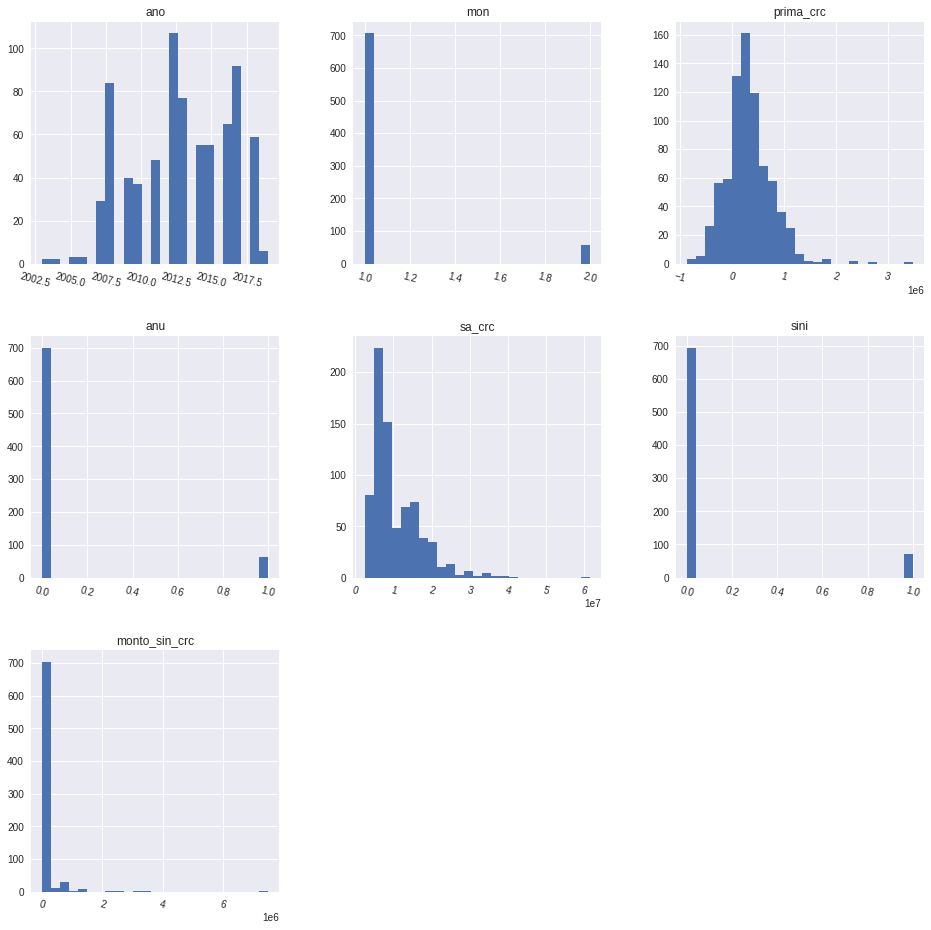

In [89]:
df2.loc[:,:].hist(bins=25,
                 figsize=(16,16),
                 xlabelsize='10',
                 ylabelsize='10',xrot=-15);

La batería de gráficos anterior nos proporciona la siguiente información:


*   Tenemos 2 valores para la moneda, por lo tanto debemos decidir el tratamiento a utilizar con ellas.
*   En las primas tenemos valores negativos. Se asumen que deben corresponder a los casos en que las pólizas fueron anuladas y la prima fue devuelta, por lo cual aparece el monto en negativo. Debemo decidir el trtamiento a usar en estos casos.
*   Vemos pocas pólizas anuladas, caso similar a los siniestros: pocas pólizas con siniestros.


---


Exploremos cada uno de los campos del datatset, su composición y distribución para ver qué información información descriptiva nos brindan:

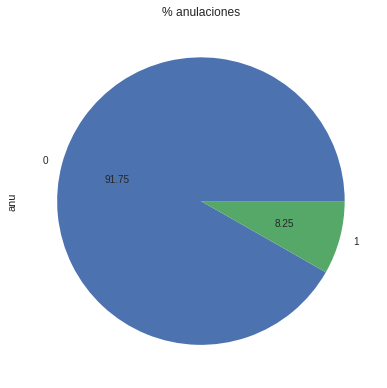

In [90]:
# Graficando 'anulaciones'
plot_anu = df2['anu'].value_counts().plot(kind='pie', autopct='%.2f', title='% anulaciones')
# Reducir el tamaño del gráfico para guardarlo
plt.tight_layout()



---


Vemos que el porcentaje de anulación de es 8.25%.

Esta dato es importante porque es justamente lo que queremos predecir.


---

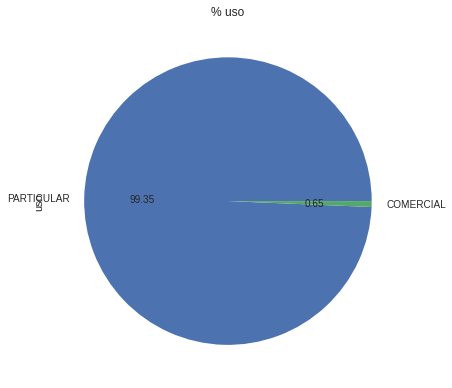

In [91]:
# Graficando 'uso'
plot_uso = df2['uso'].value_counts().plot(kind='pie', autopct='%.2f', title='% uso')
# Reducir el tamaño del gráfico para guardarlo
plt.tight_layout()

Practicamente todas las pólizas son de uso 'particular' 99.35%

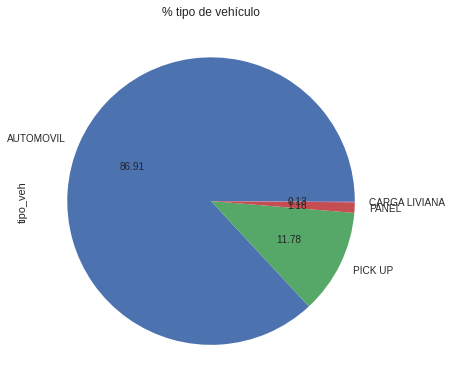

In [92]:
# Graficando 'tipo_veh'
plot_tipo = df2['tipo_veh'].value_counts().plot(kind='pie', autopct='%.2f', title='% tipo de vehículo')
# Reducir el tamaño del gráfico para guardarlo
plt.tight_layout()


*   86.91% Automoviles
*   11.78% Pick-up



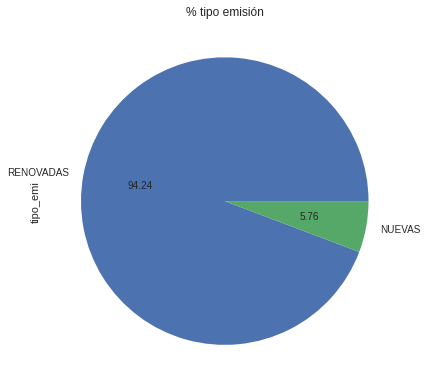

In [93]:
# Graficando 'tipo_emi'
plot_emi = df2['tipo_emi'].value_counts().plot(kind='pie', autopct='%.2f', title='% tipo emisión')
# Reducir el tamaño del gráfico para guardarlo
plt.tight_layout()

Vemos que 94.24% de las pólizas son renovaciones y 5.76% son pólizas nuevas

# Análisis Exploratorio (Cont.)

---



Una cosa que notamos en el dataset es que tenemos las variables de fecha 'inicio' y 'fin' de la póliza, las cuales podemos restar para obtener la duración en días de las pólizas. Este dato podría servirnos para nuestro objetivo ya que intuitivamente podríamos presumir que la duración de una póliza puede tener influencia en si a la larga esta pólizas es anulada o no.

In [94]:
# Creamos la variable 'duracion'
df2['duracion'] = df2['fin']-df2['inicio']
df2.head()

,inicio,fin,marca,modelo,ano,uso,mon,tipo_veh,tipo_emi,prima_crc,anu,sa_crc,sini,monto_sin_crc,duracion
poliza,,,,,,,,,,,,,,,
3021710100651,2017-04-18,2018-04-18,TOYOTA,LAND CRUISER,2008,PARTICULAR,1,PICK UP,RENOVADAS,0.0,0,17000000.0,0,0.0,365 days
3021710100652,2017-03-28,2018-03-28,JEEP,RENEGADE,2017,PARTICULAR,1,AUTOMOVIL,RENOVADAS,0.0,0,16000000.0,0,0.0,365 days
3021710100653,2017-07-11,2018-07-11,KIA,FORTE 1.6M/T,2017,PARTICULAR,1,AUTOMOVIL,RENOVADAS,0.0,0,13500000.0,0,0.0,365 days
3021710100654,2017-07-18,2018-07-18,CHEVROLET,SPARK,2008,PARTICULAR,1,AUTOMOVIL,RENOVADAS,0.0,0,3500000.0,0,0.0,365 days
3021710100655,2017-07-13,2018-07-13,HYUNDAI,ACCENT,2012,PARTICULAR,1,AUTOMOVIL,RENOVADAS,39872.3,0,8000000.0,0,0.0,365 days


In [95]:
pd.crosstab(df2.duracion, df2.anu, margins=True)

anu,0,1,All
duracion,,,
91 days 00:00:00,2,0,2
150 days 00:00:00,3,0,3
162 days 00:00:00,2,0,2
181 days 00:00:00,13,0,13
183 days 00:00:00,4,0,4
206 days 00:00:00,1,0,1
212 days 00:00:00,3,0,3
220 days 00:00:00,2,0,2
243 days 00:00:00,1,0,1


Vemos que la mayoría de las pólizas anuladas tienen 365 días o más de duración, excepto 1 que tuvo 363 días de duración. Estos resultados muestran que la presunción que hacíamos anteriormente probablemente no es válida y la duración de la póliza puede no influir en si la póliza es anulada o no. 

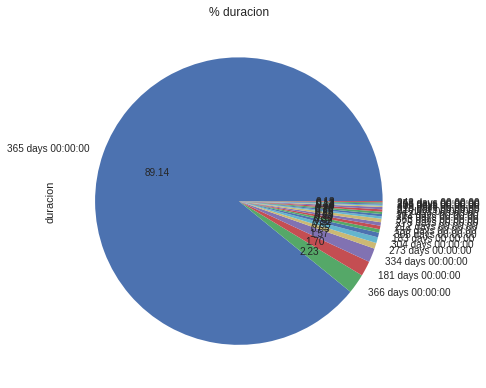

In [96]:
# Graficando 'duracion'
plot_dur = df2['duracion'].value_counts().plot(kind='pie', autopct='%.2f', title='% duracion')
# Reducir el tamaño del gráfico para guardarlo
plt.tight_layout()

*   El 89.14% de las pólizas tienen una 'duracion' de 365 días.
*   Luego, el 2.23% tienen una duración de 366 días.
*   El resto de las pólizas tienen una 'duración' inferior a 365 días

Dados estos resultados podríamos dividir esta variables en pólizas e 1 año (duración de 365 y 366 días) y pólizas menor a 1 año y ver si esta nueva variable categorizada genera algún efecto en el algoritmo de clasificación que usaremos más adelante.



In [97]:
# Creamos la variable y 'anual'
from datetime import datetime, timedelta

df2['anual'] = np.where(df2['duracion']<timedelta(days=365), 0, 1)
pd.crosstab(df2.anual, df2.anu, margins=True)

anu,0,1,All
anual,,,
0,65,1,66
1,636,62,698
All,701,63,764


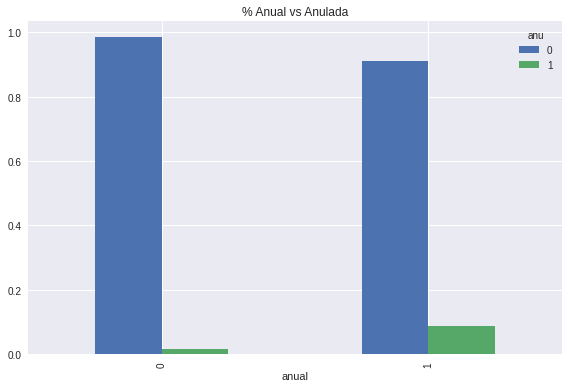

In [98]:
plot_anual = pd.crosstab(df2.anual, df2.anu, normalize='index').plot(kind='bar', title='% Anual vs Anulada')
# Reducir el tamaño del gráfico para guardarlo
plt.tight_layout()

In [99]:
pd.crosstab(df2.marca, df2.anu, margins=True, normalize='index')

anu,0,1
marca,,
AUDI,1.000000,0.000000
BAIC,1.000000,0.000000
BMW,1.000000,0.000000
CHANGAN,1.000000,0.000000
CHEVROLET,0.793103,0.206897
CITROEN,1.000000,0.000000
DAIHATSU,1.000000,0.000000
DODGE,1.000000,0.000000
FIAT,1.000000,0.000000


In [100]:
top_marcas = df2.groupby(['marca'])[['prima_crc']].sum().sort_values(by='prima_crc', ascending=False)
top_marcas

,prima_crc
marca,
TOYOTA,51910647.0
NISSAN,39100668.3
HYUNDAI,32063082.6
SUZUKI,23539403.5
KIA,18666295.5
MITSUBISHI,11272221.5
HONDA,8167920.3
CHEVROLET,7757677.2
FORD,6575160.0


In [101]:
top10_marcas = top_marcas.nlargest(10,'prima_crc').sort_values('prima_crc', ascending=True)

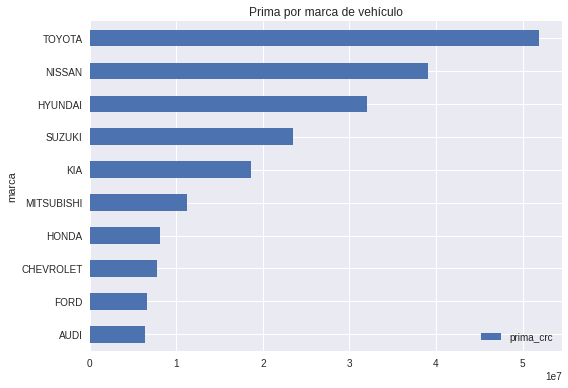

In [102]:
plt.style.use('seaborn')
plot_top10 = top10_marcas.plot.barh(y='prima_crc', title='Prima por marca de vehículo',)
# Reducir el tamaño del gráfico para guardarlo
plt.tight_layout()

In [103]:
anos = df2.groupby(['ano'])[['prima_crc']].sum()
anos

,prima_crc
ano,
2003,25707.7
2004,25628.1
2005,279499.8
2006,852329.2
2007,5800808.8
2008,15756888.6
2009,9712876.6
2010,9831972.6
2011,16672369.4


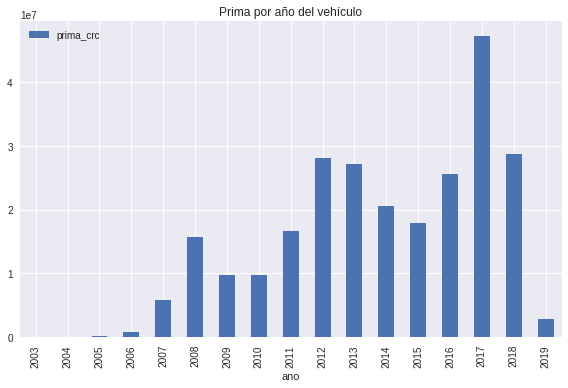

In [104]:
plot_anos = anos.plot.bar(y='prima_crc', title='Prima por año del vehículo')
# Reducir el tamaño del gráfico para guardarlo
plt.tight_layout()

In [105]:
df2.head()

,inicio,fin,marca,modelo,ano,uso,mon,tipo_veh,tipo_emi,prima_crc,anu,sa_crc,sini,monto_sin_crc,duracion,anual
poliza,,,,,,,,,,,,,,,,
3021710100651,2017-04-18,2018-04-18,TOYOTA,LAND CRUISER,2008,PARTICULAR,1,PICK UP,RENOVADAS,0.0,0,17000000.0,0,0.0,365 days,1
3021710100652,2017-03-28,2018-03-28,JEEP,RENEGADE,2017,PARTICULAR,1,AUTOMOVIL,RENOVADAS,0.0,0,16000000.0,0,0.0,365 days,1
3021710100653,2017-07-11,2018-07-11,KIA,FORTE 1.6M/T,2017,PARTICULAR,1,AUTOMOVIL,RENOVADAS,0.0,0,13500000.0,0,0.0,365 days,1
3021710100654,2017-07-18,2018-07-18,CHEVROLET,SPARK,2008,PARTICULAR,1,AUTOMOVIL,RENOVADAS,0.0,0,3500000.0,0,0.0,365 days,1
3021710100655,2017-07-13,2018-07-13,HYUNDAI,ACCENT,2012,PARTICULAR,1,AUTOMOVIL,RENOVADAS,39872.3,0,8000000.0,0,0.0,365 days,1


In [106]:
pd.crosstab(df2.anu, df2.uso, margins=True, normalize='columns')

uso,COMERCIAL,PARTICULAR,All
anu,,,
0,0.8,0.918314,0.917539
1,0.2,0.081686,0.082461


*   Uso 'comercial'  ---> 20.0% de anulaciones
*   Uso 'particular' ---> 8.16% de anulaciones



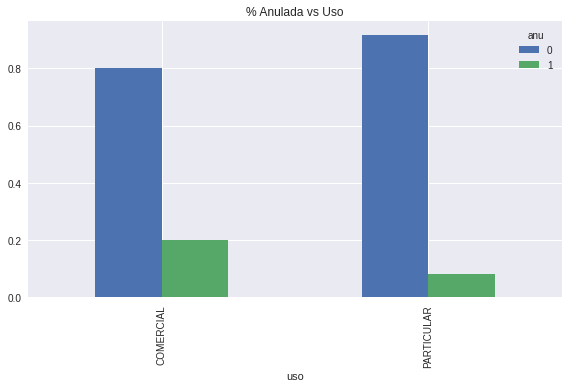

In [107]:
plot_1 = pd.crosstab(df2.uso, df2.anu, normalize='index').plot(kind='bar', title='% Anulada vs Uso')
# Reducir el tamaño del gráfico para guardarlo
plt.tight_layout()

In [108]:
pd.crosstab(df2.anu, df2.tipo_emi, margins=True, normalize='columns')

tipo_emi,NUEVAS,RENOVADAS,All
anu,,,
0,0.0,0.973611,0.917539
1,1.0,0.026389,0.082461


In [109]:
pd.crosstab(df2.anu, df2.tipo_emi, margins=True, normalize='index')

tipo_emi,NUEVAS,RENOVADAS
anu,,
0,0.000000,1.000000
1,0.698413,0.301587
All,0.057592,0.942408


De las tablas anteriores vemos varias cosas:

*   Todas las pólizas 'nuevas' fueron anuladas
*   De las pólizas 'renovadas' se anuló el 2.63%
*   Las póizas nuevas representan el 5.75% de la cartera y casi el 70% (69.8%) de las anulaciones
*   Las pólizas renovadas representan el 94.2% de la cartera y el 30.1% de las anulaciones





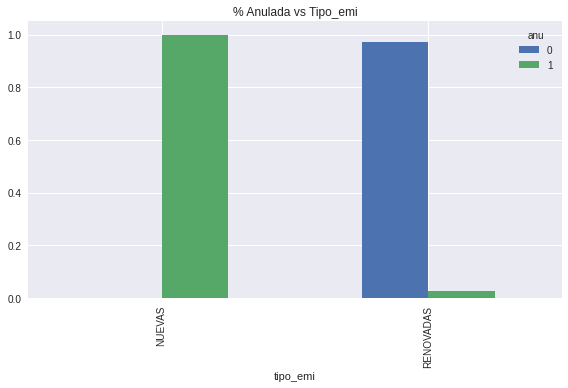

In [110]:
plot_2 = pd.crosstab(df2.tipo_emi, df2.anu, normalize='index').plot(kind='bar', title='% Anulada vs Tipo_emi')
# Reducir el tamaño del gráfico para guardarlo
plt.tight_layout()

# Preparando el datatset


Transformando las variables categóricas

---

Como tenemos variables categóricas debemos recodificarlas antes de modelar

In [111]:
# Usaremos 'Label Encoding' para etiquetar las variables categóricas con códigos numéricos.
from sklearn.preprocessing import LabelEncoder
gle = LabelEncoder()

In [112]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 764 entries, 3021710100651 to 3021910102693
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   inicio         764 non-null    datetime64[ns] 
 1   fin            764 non-null    datetime64[ns] 
 2   marca          764 non-null    object         
 3   modelo         764 non-null    object         
 4   ano            764 non-null    int64          
 5   uso            764 non-null    object         
 6   mon            764 non-null    int64          
 7   tipo_veh       764 non-null    object         
 8   tipo_emi       764 non-null    object         
 9   prima_crc      764 non-null    float64        
 10  anu            764 non-null    int64          
 11  sa_crc         764 non-null    float64        
 12  sini           764 non-null    int64          
 13  monto_sin_crc  764 non-null    float64        
 14  duracion       764 non-null    timed

In [113]:
# Variable 'marca'
marca_labels = gle.fit_transform(df2['marca'])
marca_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
marca_mappings

{0: 'AUDI',
 1: 'BAIC',
 2: 'BMW',
 3: 'CHANGAN',
 4: 'CHEVROLET',
 5: 'CITROEN',
 6: 'DAIHATSU',
 7: 'DODGE',
 8: 'FIAT',
 9: 'FORD',
 10: 'GEELY',
 11: 'HONDA',
 12: 'HYUNDAI',
 13: 'INFINITI',
 14: 'ISUZU',
 15: 'JEEP',
 16: 'KIA',
 17: 'LAND ROVER',
 18: 'LEXUS',
 19: 'MAZDA',
 20: 'MERCEDES BENZ',
 21: 'MG',
 22: 'MINI',
 23: 'MITSUBISHI',
 24: 'NISSAN',
 25: 'RANGE',
 26: 'RENAULT',
 27: 'SANGYONG',
 28: 'SUBARU',
 29: 'SUZUKI',
 30: 'TOYOTA',
 31: 'VOLKSWAGEN',
 32: 'VOLVO'}

In [114]:
# Variable 'modelo'

# La variable 'modelo' es de tipo 'object' ya que tiene valores tipo 'int' y tipo 'str'
# Esto debido a que hay vahículos cuyos nombres son números
# Para usar 'label Encoder' la variable a transformar debe ser tipo 'str'
# Por esto, es necesario transformar la variable 'modelo' a un tipo de dato 'str'

# Cambiando la variable 'modelo' a tipo 'str'
df2['modelo'] = df2['modelo'].astype(str)

# Codificando
modelo_labels = gle.fit_transform(df2['modelo'])
modelo_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
modelo_mappings

{0: '110',
 1: '3',
 2: '320',
 3: '350Z',
 4: '4RUNNER',
 5: 'A1',
 6: 'A3',
 7: 'A6',
 8: 'A7',
 9: 'ACCENT',
 10: 'ALMERA',
 11: 'ALTO',
 12: 'AMAROK',
 13: 'ASX',
 14: 'AVEO',
 15: 'BALENO',
 16: 'BERLINA',
 17: 'BERLINGO',
 18: 'BONGO',
 19: 'C3',
 20: 'CAPTIVA',
 21: 'CELERIO',
 22: 'CERATO',
 23: 'CGI',
 24: 'CHEROKEE',
 25: 'CIAZ',
 26: 'CITY',
 27: 'CIVIC',
 28: 'COLORADO',
 29: 'COOPER',
 30: 'COROLLA',
 31: 'COUNTRYMAN S',
 32: 'CR-V',
 33: 'CRETA',
 34: 'CRUZE',
 35: 'CX-5',
 36: 'CX-7',
 37: 'DMAX',
 38: 'DZIRE',
 39: 'EDGE',
 40: 'ELANTRA',
 41: 'ERTIGA',
 42: 'ESCAPE',
 43: 'EVEREST',
 44: 'EXPLORER',
 45: 'F-150',
 46: 'FORESTER',
 47: 'FORTE 1.6M/T',
 48: 'FORTUNER',
 49: 'FRONTIER',
 50: 'FUSION',
 51: 'FX',
 52: 'GC6',
 53: 'GEELY',
 54: 'GEELY_LC',
 55: 'GENESIS',
 56: 'GL',
 57: 'GRAN MAX',
 58: 'GRAND 110',
 59: 'GRAND VITARA',
 60: 'GRAND-CHEROKEE',
 61: 'GS',
 62: 'GV',
 63: 'H1',
 64: 'HILUX',
 65: 'I-10',
 66: 'I-20',
 67: 'IGNIS',
 68: 'IMPALA',
 69: 'IMPREZA

In [115]:
# Variable 'uso'
uso_labels = gle.fit_transform(df2['uso'])
uso_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
uso_mappings

{0: 'COMERCIAL', 1: 'PARTICULAR'}

In [116]:
# Variable 'tipo_veh'_
veh_labels = gle.fit_transform(df2['tipo_veh'])
veh_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
veh_mappings

{0: 'AUTOMOVIL', 1: 'CARGA LIVIANA', 2: 'PANEL', 3: 'PICK UP'}

In [117]:
# Variable 'tipo_emi'
emi_labels = gle.fit_transform(df2['tipo_emi'])
emi_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
emi_mappings

{0: 'NUEVAS', 1: 'RENOVADAS'}

In [118]:
# Replicando el dataset para conservar el flujo de cambios
df3 = df2

# Agrgando las nuevas variables categóricas
df3['MarcaLabel'] = marca_labels
df3['ModeloLabel'] = modelo_labels
df3['UsoLabel'] = uso_labels
df3['VehLabel'] = veh_labels
df3['EmiLabel'] = emi_labels

# Eliminando las columnas anteriores
df3.drop(columns={'marca','modelo','uso','tipo_veh','tipo_emi','duracion','inicio','fin'}, inplace=True)
df3

,ano,mon,prima_crc,anu,sa_crc,sini,monto_sin_crc,anual,MarcaLabel,ModeloLabel,UsoLabel,VehLabel,EmiLabel
poliza,,,,,,,,,,,,,
3021710100651,2008,1,0.0,0,17000000.0,0,0.0,1,30,75,1,3,1
3021710100652,2017,1,0.0,0,16000000.0,0,0.0,1,15,107,1,0,1
3021710100653,2017,1,0.0,0,13500000.0,0,0.0,1,16,47,1,0,1
3021710100654,2008,1,0.0,0,3500000.0,0,0.0,1,4,118,1,0,1
3021710100655,2012,1,39872.3,0,8000000.0,0,0.0,1,12,9,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3021910102411,2007,1,-253258.1,1,4300000.0,0,0.0,1,30,143,1,0,0
3021910102413,2008,1,-257957.5,1,4000000.0,0,0.0,1,12,9,1,0,0
3021910102420,2013,1,-320195.3,1,8500000.0,0,0.0,1,4,20,1,0,0


# Dividiendo el dataset en 'trainning' y 'test'

In [125]:
# Organizar los datos en la matriz de características y el vector de destino
X = df3.loc[:, df2.columns[(df2.columns != 'anu')]]
y = df3.loc[:, 'anu'].values

In [126]:
# Las clases no están equilibradas
df3['anu'].value_counts(dropna = False)

0    701
1     63
Name: anu, dtype: int64

Podemos notar claramente que las clases la variable 'anu', la cual será nuestro vector objetivo 'y' no están equilibradas.

Saber que las clases no están equilibradas es indispensable para determinar si debemos usar el método 'stratify=y' cuando hagamos la separación del dataset en 'trainning' y 'test'. Usar este método nos garantiza que tanto el set de 'trainning' como el set de 'test' tendrán la misma estructura que los datos originales.

In [206]:
# Dividir en conjuntos de prueba y entrenamiento
# Ya que la variable 'Class' está bastante desbalanceada
# Necesitamos indicar la variables 'Class' como argumento para estratificar
# Y con ello asegurar que los conjuntos de entrenamiento y prueba tendrán las mismas proporciones que 'Class'
X_train, X_test, y_train, y_test =train_test_split(X,
                                                   y,
                                                   test_size=0.3, 
                                                   random_state=0, 
                                                   stratify=y)

In [207]:
X_train

,ano,mon,prima_crc,sa_crc,sini,monto_sin_crc,anual,MarcaLabel,ModeloLabel,UsoLabel,VehLabel,EmiLabel
poliza,,,,,,,,,,,,
3021810101549,2009,1,259045.7,3600000.0,0,0.0,1,4,14,1,0,1
3021810101838,2018,2,447931.8,14668502.7,0,0.0,1,30,111,1,0,1
3021810100955,2009,1,191661.1,4500000.0,0,0.0,1,19,80,1,0,1
3021810102186,2011,1,311558.2,4000000.0,0,0.0,1,24,142,1,0,1
3021710100822,2011,1,1063891.8,11000000.0,0,0.0,1,12,114,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3021810102002,2012,1,307923.4,5500000.0,0,0.0,1,12,9,1,0,1
3021910102397,2008,1,681357.9,20000000.0,0,0.0,1,30,132,1,3,0
3021810101451,2017,1,489170.4,15000000.0,0,0.0,1,24,102,1,0,1


# Estandarizando los datos

In [203]:
# Estandarizar datos
scaler = StandardScaler()
# Ajustar solo al conjunto de entrenamiento
scaler.fit(X_train)
# Aplicar  transform tanto al conjunto de entrenamiento como al conjunto de prueba
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# 1) Regresión Logística

---


In [129]:
#1 Importando el modelo
from sklearn.linear_model import LogisticRegression

#2 Definiendo la instancia del modelo
log_reg = LogisticRegression()

#3 Entrenando el modelo con la Matriz 'X' y el vector 'y'
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [130]:
#4 Evaluando el desempeño del modelo
print('Test accuracy:', log_reg.score(X_test, y_test))
print('Test accuracy:', log_reg.score(X_test, y_test))

Test accuracy: 0.9739130434782609
Test accuracy: 0.9739130434782609


# Definición de criterios para evluar el desempeño del modelo

---

Vemos que el 'accuracy' nos da un valor muy bueno, sin embargo el vector objetivo 'y' presenta 2 clases 0 y 1 las cuales ya vimos que están muy desbalanceadas, y sabemos que en casos como estos no se recomienda la medida de 'accuracy' para evaluar el modelo debido ya que resulta engañosa.

Por lo tanto, nos basaremos en las métricas de 'recall', 'auc' y 'f1-score' para determinar si el modelo es un buen predictor.

In [131]:
# Importando métricas de evaluación
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [134]:
print('Test recall:', recall_score(y_test, log_reg.predict(X_test)))
print('Test roc_auc:', roc_auc_score(y_test, log_reg.predict(X_test)))
print('Test f1-score:', f1_score(y_test, log_reg.predict(X_test)))

Test recall: 0.6842105263157895
Test roc_auc: 0.8421052631578947
Test f1-score: 0.8125000000000001


Mirando las métricas anteriores notamos que el modelo no es tan buen predictor como la métrica de accuracy nos hacía presumir. 

Veamos ahora la matriz de confusión para evaluar las predicciones puntualmente.

In [151]:
lr_matrix = confusion_matrix(y_test, log_reg.predict(X_test))
lr_matrix

array([[211,   0],
       [  6,  13]])

In [137]:
print(classification_report(y_test, log_reg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       211
           1       1.00      0.68      0.81        19

    accuracy                           0.97       230
   macro avg       0.99      0.84      0.90       230
weighted avg       0.97      0.97      0.97       230



Podemos ver en la matriz anterior que el modelo se equivoca en 6 casos (6+0) y acierta en 13 casos de los que nos interesa que son los fraudes. Además, vemos las métricas que evaluaremos:

* recall = 0.68
* f1-score = 0.81
* roc_auc = 0.84

Estos son valores muy deficientes para consideraese un buen predictor. Por lo tanto, probaremos con otros modelos para ver con cuál obtenemos mejores resultados.


---

IMPORTANTE:

Recordar que estamos usando instancia que el modelo trae por defecto, por lo tanto deberíamos optimizar hiperparámetros a ver si obtenemos mejores resultados.

No obstante, vamos a utilizar cada modelo con sus instancias por defecto y miraremos cuál arroja mejor resultado, y con ese modelo entonces realizaremos la optimización de hiperparámetros.


---



Creamos la matriz de confusión en un gráfico de calor para tener una imagen visual más clara de los resultados de las predicciones del modelo

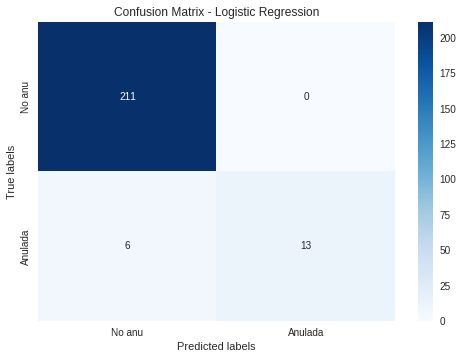

In [152]:
# Confusion Matrix

# Crea la matriz de confusión
lr_matrix = confusion_matrix(y_test, log_reg.predict(X_test))

# Crea el gráfico - mapa de calor (heatmap)
ax = plt.subplot()
sb.heatmap(lr_matrix, annot=True, ax = ax, fmt='0.4g', cmap='Blues'); #annot=True to annotate cells

# Coloca tiítulos y etiquetas (labels, title and ticks)
ax.set_title('Confusion Matrix - Logistic Regression');
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(['No anu', 'Anulada']); ax.yaxis.set_ticklabels(['No anu', 'Anulada']);

# 2) KNN Classifier

---

In [159]:
#1 Importando el modelo
from sklearn.neighbors import KNeighborsClassifier

#2 Definiendo la instancia del modelo
knn = KNeighborsClassifier()

#3 Entrenando el modelo
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [162]:
#4 Evaluando el desempeño del modelo
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       211
           1       0.93      0.74      0.82        19

    accuracy                           0.97       230
   macro avg       0.96      0.87      0.90       230
weighted avg       0.97      0.97      0.97       230





---


* recall = 0.74
* f1-score = 0.82
* roc_auc = 0.87

Estos son valores mejoran un poco respecto al modelo con regresión logística, sin embargo siguen siendo niveles muy deficientes para consideraese un buen predictor.

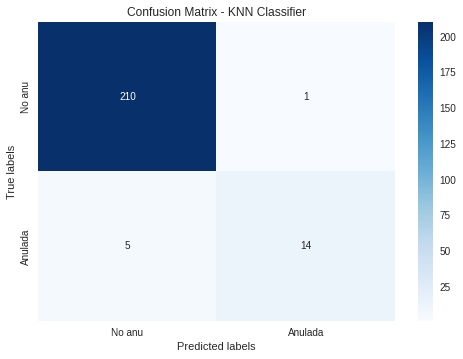

In [160]:
# Confusion Matrix

# Crea la matriz de confusión
knn_matrix = confusion_matrix(y_test, knn.predict(X_test))

# Crea el gráfico - mapa de calor (heatmap)
ax = plt.subplot()
sb.heatmap(knn_matrix, annot=True, ax = ax, fmt='0.4g', cmap='Blues'); #annot=True to annotate cells

# Coloca tiítulos y etiquetas (labels, title and ticks)
ax.set_title('Confusion Matrix - KNN Classifier');
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(['No anu', 'Anulada']); ax.yaxis.set_ticklabels(['No anu', 'Anulada']);

Podemos ver en la matriz anterior que el modelo acierta en 14 casos de los que nos interesa que son las pólizas anuladas, un caso más que el modelo anterior, lo cual es positivo.

Sin embargo, a pesar de que se equivoca en 6 casos igual que el modelo anterior, este modelo genera más ruido en sus predicciones ya que se equivoca de 2 maneras:

1.   No logra identificar 5 casos que son anulaciones reales.
2.   Identifica un 1 caso como anulación que en realidad no lo es.

El modelo anterior (regresión logística) se equivoca 6 casos pero comote 1 tipo de error.

Este modelo (knn) se equivoca igual en 6 casos pero comte 2 tipos de errores.

# 3) Random Forest

---


In [163]:
#1 Importando el modelo
from sklearn.ensemble import RandomForestClassifier

#2 Definiendo la instancia del modelo
clf = RandomForestClassifier(oob_score=True, random_state=1)

#3 Entrenando el modelo
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=1, verbose=0,
                       warm_start=False)

In [164]:
#4 Evaluando el desempeño del modelo
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       211
           1       1.00      0.84      0.91        19

    accuracy                           0.99       230
   macro avg       0.99      0.92      0.95       230
weighted avg       0.99      0.99      0.99       230



---
* recall = 0.84
* f1-score = 0.91
* roc_auc = 0.92

Estos valores muestran una mejoría notable con respecto a los modelos anteriores.

Veamos las predcciones con la matriz de confusión.

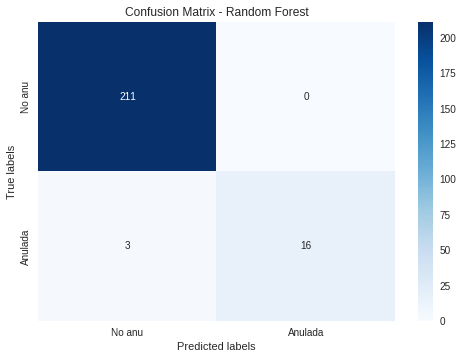

In [165]:
# Confusion Matrix

# Crea la matriz de confusión
clf_matrix = confusion_matrix(y_test, clf.predict(X_test))

# Crea el gráfico - mapa de calor (heatmap)
ax = plt.subplot()
sb.heatmap(clf_matrix, annot=True, ax = ax, fmt='0.4g', cmap='Blues'); #annot=True to annotate cells

# Coloca tiítulos y etiquetas (labels, title and ticks)
ax.set_title('Confusion Matrix - Random Forest');
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(['No anu', 'Anulada']); ax.yaxis.set_ticklabels(['No anu', 'Anulada']);

Podemos ver en la matriz anterior que el modelo acierta en 16 casos y se equivoca sólo en 3 casos que son anulaciones reales y no los logra identificar todavía.

Hasta ahora es el modelo con mejor desempeño.
Sigamos probando otros modelos.

# 4) GBC (Gradient Boosting Classifier)

---

In [166]:
#1 Importando el modelo
from sklearn.ensemble import GradientBoostingClassifier

#2 Definiendo la instancia del modelo
gbc = GradientBoostingClassifier()

#3 Entrenando el modelo
gbc.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [167]:
#4 Evaluando el desempeño del modelo
print(classification_report(y_test, gbc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       211
           1       1.00      0.84      0.91        19

    accuracy                           0.99       230
   macro avg       0.99      0.92      0.95       230
weighted avg       0.99      0.99      0.99       230



---
* recall = 0.84
* f1-score = 0.91
* roc_auc = 0.92

Estos valores son similares a los obtenidos con 'Random Forest'.

Veamos las predcciones con la matriz de confusión.

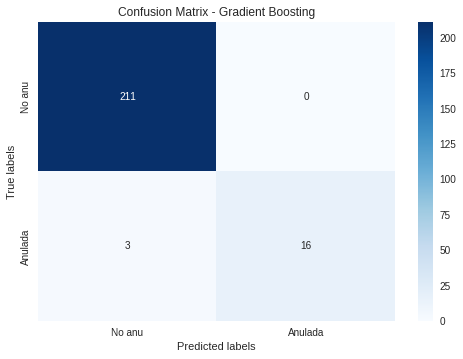

In [168]:
# Confusion Matrix

# Crea la matriz de confusión
gbc_matrix = confusion_matrix(y_test, gbc.predict(X_test))

# Crea el gráfico - mapa de calor (heatmap)
ax = plt.subplot()
sb.heatmap(gbc_matrix, annot=True, ax = ax, fmt='0.4g', cmap='Blues'); #annot=True to annotate cells

# Coloca tiítulos y etiquetas (labels, title and ticks)
ax.set_title('Confusion Matrix - Gradient Boosting');
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(['No anu', 'Anulada']); ax.yaxis.set_ticklabels(['No anu', 'Anulada']);

Podemos ver en la matriz anterior que el modelo acierta en 16 casos y se equivoca sólo en 3 casos que son anulaciones reales y no los logra identificar.

El desempeño es similar al que obtuvimos usando 'Random Forest'.
Sigamos probando otros modelos.

# 5) LightGBM (Light Gradient Boosting Machine)

---

In [169]:
#1 Importando el modelo
from lightgbm import LGBMClassifier

#2 Definiendo la instancia del modelo
lgbm = LGBMClassifier()

#3 Entrenando el modelo
lgbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [170]:
#4 Evaluando el desempeño del modelo
print(classification_report(y_test, lgbm.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       211
           1       1.00      0.89      0.94        19

    accuracy                           0.99       230
   macro avg       1.00      0.95      0.97       230
weighted avg       0.99      0.99      0.99       230



---
* recall = 0.89
* f1-score = 0.94
* roc_auc = 0.95

Estos valores son mejores que los obtenidos con 'Random Forest' y 'GBC'.

Veamos las predcciones con la matriz de confusión.

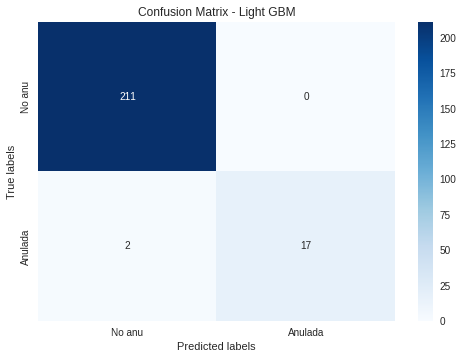

In [171]:
# Confusion Matrix

# Crea la matriz de confusión
lgbm_matrix = confusion_matrix(y_test, lgbm.predict(X_test))

# Crea el gráfico - mapa de calor (heatmap)
ax = plt.subplot()
sb.heatmap(lgbm_matrix, annot=True, ax = ax, fmt='0.4g', cmap='Blues'); #annot=True to annotate cells

# Coloca tiítulos y etiquetas (labels, title and ticks)
ax.set_title('Confusion Matrix - Light GBM');
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(['No anu', 'Anulada']); ax.yaxis.set_ticklabels(['No anu', 'Anulada']);

Podemos ver en la matriz anterior que el modelo acierta en 17 casos y se equivoca sólo en 2 casos de anulaciones efectivas que no logra identificar.

Es el mejor modelo de los probados hasta ahora.
Sigamos probando otros modelos.

# 6) XGBoost

---

In [172]:
#1 Importando el modelo
from xgboost import XGBClassifier

#2 Definiendo la instancia del modelo
xgb = XGBClassifier()

#3 Entrenando el modelo
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [173]:
#4 Evaluando el desempeño del modelo
print(classification_report(y_test, xgb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       211
           1       1.00      0.74      0.85        19

    accuracy                           0.98       230
   macro avg       0.99      0.87      0.92       230
weighted avg       0.98      0.98      0.98       230



---
* recall = 0.74
* f1-score = 0.85
* roc_auc = 0.87

Estos valores desmejoran mucho con respecto al modelo con 'Light GBM'.

Veamos las predcciones con la matriz de confusión.

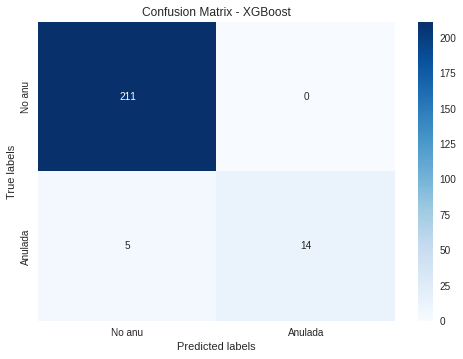

In [174]:
# Confusion Matrix

# Crea la matriz de confusión
xgb_matrix = confusion_matrix(y_test, xgb.predict(X_test))

# Crea el gráfico - mapa de calor (heatmap)
ax = plt.subplot()
sb.heatmap(xgb_matrix, annot=True, ax = ax, fmt='0.4g', cmap='Blues'); #annot=True to annotate cells

# Coloca tiítulos y etiquetas (labels, title and ticks)
ax.set_title('Confusion Matrix - XGBoost');
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(['No anu', 'Anulada']); ax.yaxis.set_ticklabels(['No anu', 'Anulada']);

Podemos ver en la matriz anterior que el modelo acierta en 14 casos y se equivoca en 5 casos de anulaciones efectivas que no logra identificar.

El mejor modelo sigue siendo el modelo con 'LightGBM'.

# Selección de Modelos a optimizar

---
Luego de haber probado varios modelos, obtuvimos los siguientes resultados:

* 1) LogisticRegression  -->  recall = 0.68 y errores = 6 casos
* 2) KNN Classifier      -->  recall = 0.74 y errores = 6 casos
* 3) Random Forest       -->  recall = 0.84 y errores = 3 casos
* 4) Gradient Boosting   -->  recall = 0.84 y errores = 3 casos
* 5) Light GBM           -->  recall = 0.89 y errores = 2 casos  <------- Modelo a optimizar
* 6) XGBoost:            -->  recall = 0.74 y errores = 5 casos

Dados estos resultados, nos quedaremos con el modelo 'LightGBM' y pasaremos a la fase de optimizar sus hiperparámetros para ver si mejora su capacidad predictiva.

# Optimización de Hiperparámetros (LightGBM)

En el primer ejercicio con este modelo 'n_estimator'=5, ahora probaremos con una alternativa por encima y otra por debajo de este valor para evaluar cuál nos resulta mejor en este caso.

In [177]:
# El siguiente código se obtuvo de la siguiente fuente mencionada a continuación:
# y fue ajustado de acuerdo a las necesidades de este ejercicio:
# https://www.cienciadedatos.net/

In [178]:
# Importando librerías
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance
import multiprocessing

In [179]:
X_train2 = pd.DataFrame(X_train)
y_train2 = pd.DataFrame(y_train)

In [180]:
# Crear conjunto de validación
# ==============================================================================
np.random.seed(123)
idx_validacion = np.random.choice(
                    X_train2.shape[0],
                    size= int(X_train2.shape[0]*0.1),
                    replace=False
                 )

X_val = X_train2.iloc[idx_validacion, :].copy()
y_val = y_train2.iloc[idx_validacion].copy()

X_train_grid = X_train2.reset_index(drop = True).drop(idx_validacion, axis = 0).copy()
y_train_grid = y_train2.reset_index(drop = True).drop(idx_validacion, axis = 0).copy()

In [181]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'n_estimators'     : [100, 500, 1000, 5000],
              'max_depth'        : [-1, 1, 3, 5, 10, 20],
              'subsample'        : [0.5, 1],
              'learning_rate'    : [0.001, 0.01, 0.1],
              'boosting_type'    : ['gbdt']
             }

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = LGBMClassifier(random_state=123),
        param_grid = param_grid,
        scoring    = 'recall',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=3, n_repeats=1, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train_grid, y = y_train_grid)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=RepeatedKFold(n_repeats=1, n_splits=3, random_state=123),
             error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      rand...
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=1,
             param_grid={'boosting_type': ['gbdt'],
   

In [182]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'boosting_type': 'gbdt', 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5000, 'subsample': 0.5} : 0.5702075702075703 recall


In [183]:
# Error de test del modelo final
# ==============================================================================
modelo_final = grid.best_estimator_
predicciones = modelo_final.predict(X = X_test,)

In [184]:
#4 Evaluando el desempeño del modelo
print(classification_report(y_test, modelo_final.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       211
           1       1.00      1.00      1.00        19

    accuracy                           1.00       230
   macro avg       1.00      1.00      1.00       230
weighted avg       1.00      1.00      1.00       230



---
* recall = 1.0
* f1-score = 1.0
* roc_auc = 1.0

Estos valores muestran que el modelo con los hiperparámetros optimizados tiene un desempeño perfecto.

Veamos las predcciones con la matriz de confusión.

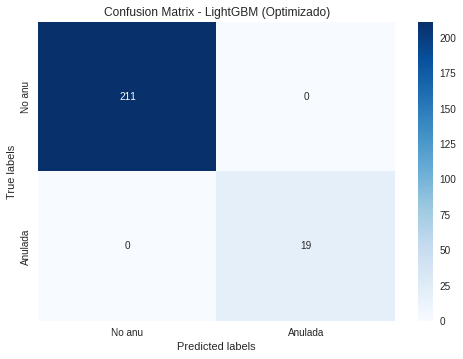

In [185]:
# Confusion Matrix

# Crea la matriz de confusión
matrix_final = confusion_matrix(y_test, modelo_final.predict(X_test))

# Crea el gráfico - mapa de calor (heatmap)
ax = plt.subplot()
sb.heatmap(matrix_final, annot=True, ax = ax, fmt='0.4g', cmap='Blues'); #annot=True to annotate cells

# Coloca tiítulos y etiquetas (labels, title and ticks)
ax.set_title('Confusion Matrix - LightGBM (Optimizado)');
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.xaxis.set_ticklabels(['No anu', 'Anulada']); ax.yaxis.set_ticklabels(['No anu', 'Anulada']);

En la matriz anterior podemos ver que el modelo logra identificar correctamente todos los casos de anulaciones, por lo tanto tenemos un modelo con un poder predictivo perfecto.

# Importancia de los predictores

In [208]:
# Generamos de nuevo la partición ya que trabajamos con la matriz 'X_train' escalada y ésta
# No tiene los nombres de las columnas por ser un arreglo numpy.
# Podemos generarla de nuevo con la misma sentencia y obtener los mismos resultados
# manteniendo el mismo 'random_state'
X_train, X_test, y_train, y_test =train_test_split(X,
                                                   y,
                                                   test_size=0.3, 
                                                   random_state=0, 
                                                   stratify=y)

In [210]:
importancia_predictores = pd.DataFrame(
                            {'predictor': X_train.columns,
                             'importancia': modelo_final.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
3,sa_crc,8817
8,ModeloLabel,7004
2,prima_crc,5033
0,ano,4126
7,MarcaLabel,2872
11,EmiLabel,1186
5,monto_sin_crc,998
1,mon,430
10,VehLabel,187
4,sini,41


Acá observamos que los predictores más importantes en este algoritmo son: el monto del vehículo (sa_crc), el modelo (ModeloLabel) y la prima de la póliza (prima_crc). Además vemos que la variable que creamos 'anual' no tuvo mayor peso para el algoritmo, por lo tanto nuestra presunción de que la duración de la póliza podría influir en la anulación no era correcta.